# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\Santosh\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [4,6, 8, 9,10,12,14,17] , and the best `min_samples_split` in range [2,10,20,30,40,50])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# 1.1 Reading Data

In [2]:
project_data=pd.read_csv('train_data.csv')
resource_data=pd.read_csv('resources.csv')

In [3]:
print("number of data points in train data", project_data.shape)
print('-'*50)
print("the attributes of data :", project_data.columns.values)

number of data points in train data (109248, 17)
--------------------------------------------------
the attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data=resource_data.groupby('id').agg({'price':'sum','quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [6]:
# join two dataframes in python:
project_data=pd.merge(project_data, price_data, on='id', how='left')

In [7]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity  
0        23  
1         1

In [8]:
# presence of the numerical digits in a strings with numeric : https://stackoverflow.com/a/19859308/8089731

def hasNumbers(inputString):
    return any(i.isdigit()for i in inputString)

p1=project_data[['id','project_resource_summary']]
p1=pd.DataFrame(data=p1)
p1.columns=['id','digits_in_summary']
p1['digits_in_summary']=p1['digits_in_summary'].map(hasNumbers)

# https://stackoverflow.com/a/17383325/8089731
p1['digits_in_summary'] = p1['digits_in_summary'].astype(int)
project_data=pd.merge(project_data,p1,on='id',how='left')
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             0                    0  154.60   
1                                             7                    1  299.00   
2                                             1                    0  516.85   
3                                             4                    1  232.90   
4                                             1                    1   67.98   

   quantity  digits_in_summary  
0        23                  0  
1         1                  0  
2        22                  0  
3         4                  0  
4         4                  0

# 1.2 preprocessing of project_subject_categories

In [9]:
categories=list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list=[]
for i in categories:
    temp=""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','):# it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split():# this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','')# if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j=j.replace(' ','')# we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp=temp.replace('&','_')# we are replacing the & value into
    cat_list.append(temp.strip())

project_data['clean_categories']=cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(5)

In [10]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())
my_counter

In [11]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

# 1.3 preprocessing of project_subject_subcategories

In [12]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [13]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

In [14]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

In [15]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

# 1.3 Text preprocessing

In [16]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [17]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [13:44<00:00, 132.55it/s]


In [20]:
preprocessed_essays[2000]

'describing students not easy task many would say inspirational creative hard working they unique unique interests learning abilities much what common desire learn day despite difficulties encounter our classroom amazing understand everyone learns pace as teacher i pride making sure students always engaged motivated inspired create learning this project help students choose seating appropriate developmentally many students tire sitting chairs lessons different seats available helps keep engaged learning flexible seating important classroom many students struggle attention focus engagement we currently stability balls seating well regular chairs stools help students trouble balance find difficult sit stability ball long period time we excited try stools part engaging classroom community nannan'

In [21]:
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for title in tqdm(project_data['project_title'].values):
    _title = decontracted(title)
    _title = _title.replace('\\r', ' ')
    _title = _title.replace('\\"', ' ')
    _title = _title.replace('\\n', ' ')
    _title = re.sub('[^A-Za-z0-9]+', ' ', _title)
    # https://gist.github.com/sebleier/554280
    _title = ' '.join(e for e in _title.split() if e not in stopwords)
    preprocessed_titles.append(_title.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:37<00:00, 2939.64it/s]


In [22]:
preprocessed_titles[2000]

'steady stools active learning'

In [23]:
project_grade_catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

project_grade_cat_list = []
for i in tqdm(project_grade_catogories):
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    project_grade_cat_list.append(temp.strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 47519.74it/s]


In [24]:
project_data['clean_project_grade_category'] = project_grade_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   
2           AZ        2016-08-31 12:03:56   
3           KY        2016-10-06 21:16:17   
4           TX        2016-07-11 01:10:09   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  ...  \
0  \"The limits of your language are the limits o...             NaN  ...   
1  The projector we need for our school is very c...             NaN  ...   
2  The students on the campus come to school know...             NaN  ...   
3  My students live in high poverty conditions wi...             NaN  ...   
4  For many students, math is a subject that does...             NaN  ...   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   
2  My students need shine guards, athletic socks,...   
3  My students need to engage in Reading and Math...   
4  My students need hands on practice in mathemat...   

  teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            0                    0  154.60   
1                                            7                    1  299.00   
2                                            1                    0  516.85   
3                                            4                    1  232.90   
4                                            1                    1   67.98   

   quantity  digits_in_summary                clean_categories  \
0        23                  0               Literacy_Language   
1         1                  0    History_Civics Health_Sports   
2        22                  0                   Health_Sports   
3         4                  0  Literacy_Language Math_Science   
4         4                  0                    Math_Science   

            clean_subcategories  \
0                  ESL Literacy   
1  Civics_Government TeamSports   
2    Health_Wellness TeamSports   
3          Literacy Mathematics   
4                   Mathematics   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

  clean_project_grade_category  
0                 GradesPreK-2  
1                    Grades6-8  
2                    Grades6-8  
3                 GradesPreK-2  
4                 GradesPreK-2  

[5 rows x 21 columns]

In [25]:
project_data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   
2           AZ        2016-08-31 12:03:56   
3           KY        2016-10-06 21:16:17   
4           TX        2016-07-11 01:10:09   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   
2  My students need shine guards, athletic socks,...   
3  My students need to engage in Reading and Math...   
4  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             0                    0  154.60   
1                                             7                    1  299.00   
2                                             1                    0  516.85   
3                                             4                    1  232.90   
4                                             1                    1   67.98   

   quantity  digits_in_summary                clean_categories  \
0        23                  0               Literacy_Language   
1         1                  0    History_Civics Health_Sports   
2        22                  0                   Health_Sports   
3         4                  0  Literacy_Language Math_Science   
4         4                  0                    Math_Science   

            clean_subcategories  \
0                  ESL Literacy   
1  Civics_Government TeamSports   
2    Health_Wellness TeamSports   
3          Literacy Mathematics   
4                   Mathematics   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

  clean_project_grade_category  
0                 GradesPreK-2  
1                    Grades6-8  
2                    Grades6-8  
3                 GradesPreK-2  
4                 GradesPreK-2

In [26]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data['preprocessed_titles'] = preprocessed_titles

In [27]:
#Replacing Nan's with maximum occured value: https://stackoverflow.com/a/51053916/8089731
project_data['teacher_prefix'].value_counts().argmax()
project_data.fillna(value=project_data['teacher_prefix'].value_counts().argmax(),axis=1,inplace=True)

# 1.5 Preparing data for models

<h1>2. Logistic Regression </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [28]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [29]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'digits_in_summary', 'clean_categories',
       'clean_subcategories', 'essay', 'clean_project_grade_category',
       'preprocessed_essays', 'preprocessed_titles'],
      dtype='object')

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [31]:
X_train, X_test, y_train, y_test = train_test_split(project_data,project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

# Vectorizing Categorical data
# one hot encoding

In [32]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cat = CountVectorizer(lowercase=False, binary=True)
vectorizer_cat.fit(X_train['clean_categories'].values)
print(vectorizer_cat.get_feature_names())


categories_one_hot_xtrain = vectorizer_cat.transform(X_train['clean_categories'].values)
categories_one_hot_xcv = vectorizer_cat.transform(X_cv['clean_categories'].values)
categories_one_hot_xtest = vectorizer_cat.transform(X_test['clean_categories'].values)
print("Shape of matrix after one hot encodig_xtrain ",categories_one_hot_xtrain.shape)
print("Shape of matrix after one hot encodig_xcv ",categories_one_hot_xcv.shape)
print("Shape of matrix after one hot encodig_xtest ",categories_one_hot_xtest.shape)

['AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'Literacy_Language', 'Math_Science', 'Music_Arts', 'SpecialNeeds', 'Warmth']
Shape of matrix after one hot encodig_xtrain  (49041, 9)
Shape of matrix after one hot encodig_xcv  (24155, 9)
Shape of matrix after one hot encodig_xtest  (36052, 9)


In [33]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer_sub_cat = CountVectorizer(lowercase=False, binary=True)
vectorizer_sub_cat.fit(X_train['clean_subcategories'].values)
print(vectorizer_sub_cat.get_feature_names())


sub_categories_one_hot_xtrain = vectorizer_sub_cat.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_xcv = vectorizer_sub_cat.transform(X_cv['clean_subcategories'].values)
sub_categories_one_hot_xtest = vectorizer_sub_cat.transform(X_test['clean_subcategories'].values)
print("Shape of matrix after one hot encodig_xtrain ",sub_categories_one_hot_xtrain.shape)
print("Shape of matrix after one hot encodig_xcv ",sub_categories_one_hot_xcv.shape)
print("Shape of matrix after one hot encodig_xtest ",sub_categories_one_hot_xtest.shape)

['AppliedSciences', 'Care_Hunger', 'CharacterEducation', 'Civics_Government', 'College_CareerPrep', 'CommunityService', 'ESL', 'EarlyDevelopment', 'Economics', 'EnvironmentalScience', 'Extracurricular', 'FinancialLiteracy', 'ForeignLanguages', 'Gym_Fitness', 'Health_LifeScience', 'Health_Wellness', 'History_Geography', 'Literacy', 'Literature_Writing', 'Mathematics', 'Music', 'NutritionEducation', 'Other', 'ParentInvolvement', 'PerformingArts', 'SocialSciences', 'SpecialNeeds', 'TeamSports', 'VisualArts', 'Warmth']
Shape of matrix after one hot encodig_xtrain  (49041, 30)
Shape of matrix after one hot encodig_xcv  (24155, 30)
Shape of matrix after one hot encodig_xtest  (36052, 30)


In [34]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_state = CountVectorizer(lowercase=False, binary=True)
vectorizer_state.fit(X_train['school_state'].values)
print(vectorizer_state.get_feature_names())


school_state_one_hot_xtrain = vectorizer_state.transform(X_train['school_state'].values)
school_state_one_hot_xcv = vectorizer_state.transform(X_cv['school_state'].values)
school_state_one_hot_xtest = vectorizer_state.transform(X_test['school_state'].values)
print("Shape of matrix after one hot encodig_train ",school_state_one_hot_xtrain.shape)
print("Shape of matrix after one hot encodig_cv ",school_state_one_hot_xcv.shape)
print("Shape of matrix after one hot encodig_test ",school_state_one_hot_xtest.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig_train  (49041, 51)
Shape of matrix after one hot encodig_cv  (24155, 51)
Shape of matrix after one hot encodig_test  (36052, 51)


In [35]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_teacherprefix = CountVectorizer( lowercase=False, binary=True)
vectorizer_teacherprefix.fit(X_train['teacher_prefix'].values.astype('U'))
print(vectorizer_teacherprefix.get_feature_names())

#https://stackoverflow.com/a/39308809/8089731
teacher_prefix_one_hot_xtrain = vectorizer_teacherprefix.transform(X_train['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_xcv = vectorizer_teacherprefix.transform(X_cv['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_xtest = vectorizer_teacherprefix.transform(X_test['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig_xtrain ",teacher_prefix_one_hot_xtrain.shape)
print("Shape of matrix after one hot encodig_xcv ",teacher_prefix_one_hot_xcv.shape)
print("Shape of matrix after one hot encodig_xtest ",teacher_prefix_one_hot_xtest.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encodig_xtrain  (49041, 5)
Shape of matrix after one hot encodig_xcv  (24155, 5)
Shape of matrix after one hot encodig_xtest  (36052, 5)


In [36]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
# https://stackoverflow.com/a/38161028/8089731
pattern = "(?u)\\b[\\w-]+\\b"
vectorizer_projectgrade = CountVectorizer(token_pattern=pattern, lowercase=False, binary=True)
vectorizer_projectgrade.fit(X_train['clean_project_grade_category'].values)
print(vectorizer_projectgrade.get_feature_names())

#https://stackoverflow.com/a/39308809/8089731
project_grade_cat_one_hot_xtrain = vectorizer_projectgrade.transform(X_train['clean_project_grade_category'].values)
project_grade_cat_one_hot_xcv = vectorizer_projectgrade.transform(X_cv['clean_project_grade_category'].values)
project_grade_cat_one_hot_xtest = vectorizer_projectgrade.transform(X_test['clean_project_grade_category'].values)
print("Shape of matrix after one hot encodig_xtrain ",project_grade_cat_one_hot_xtrain.shape)
print("Shape of matrix after one hot encodig_xcv ",project_grade_cat_one_hot_xcv.shape)
print("Shape of matrix after one hot encodig_xtest ",project_grade_cat_one_hot_xtest.shape)

['Grades3-5', 'Grades6-8', 'Grades9-12', 'GradesPreK-2']
Shape of matrix after one hot encodig_xtrain  (49041, 4)
Shape of matrix after one hot encodig_xcv  (24155, 4)
Shape of matrix after one hot encodig_xtest  (36052, 4)


# Vectorizing Numerical features

In [37]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_xtrain = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_standardized_xcv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
price_standardized_xtest = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
print("shape of price_standardized_xtrain",price_standardized_xtrain.shape)
print("shape of price_standardized_xcv",price_standardized_xcv.shape)
print("shape of price_standardized_xtest",price_standardized_xtest.shape)

shape of price_standardized_xtrain (49041, 1)
shape of price_standardized_xcv (24155, 1)
shape of price_standardized_xtest (36052, 1)


In [38]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized_xtrain = quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))
quantity_standardized_xcv = quantity_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))
quantity_standardized_xtest = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
print("shape of quantity_standardized_xtrain",quantity_standardized_xtrain.shape)
print("shape of quantity_standardized_xcv",quantity_standardized_xcv.shape)
print("shape of quantity_standardized_xtest",quantity_standardized_xtest.shape)

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



shape of quantity_standardized_xtrain (49041, 1)
shape of quantity_standardized_xcv (24155, 1)
shape of quantity_standardized_xtest (36052, 1)


In [39]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_num_prev_projects_scalar = StandardScaler()
teacher_num_prev_projects_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_num_prev_projects_standardized_xtrain = teacher_num_prev_projects_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
teacher_num_prev_projects_standardized_xcv = teacher_num_prev_projects_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
teacher_num_prev_projects_standardized_xtest = teacher_num_prev_projects_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(" shape of teacher_number_of_previously_posted_projects_standardized_xtrain",teacher_num_prev_projects_standardized_xtrain.shape)
print(" shape of teacher_number_of_previously_posted_projects_standardized_xcv",teacher_num_prev_projects_standardized_xcv.shape)
print(" shape of teacher_number_of_previously_posted_projects_standardized_xtest",teacher_num_prev_projects_standardized_xtest.shape)

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



 shape of teacher_number_of_previously_posted_projects_standardized_xtrain (49041, 1)
 shape of teacher_number_of_previously_posted_projects_standardized_xcv (24155, 1)
 shape of teacher_number_of_previously_posted_projects_standardized_xtest (36052, 1)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [40]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# Vectorizing Text data
# BOW on eassay

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [41]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [42]:
# BOW on eassay
# We are considering only the words which appeared in at least 10 documents(rows or projects).

vectorizer_bow_essays = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))
vectorizer_bow_essays.fit(X_train['preprocessed_essays'])

essay_text_bow_xtrain = vectorizer_bow_essays.transform(X_train['preprocessed_essays'])
essay_text_bow_xcv = vectorizer_bow_essays.transform(X_cv['preprocessed_essays'])
essay_text_bow_xtest = vectorizer_bow_essays.transform(X_test['preprocessed_essays'])

print("Shape of matrix after BOW_text_essay X_train ",essay_text_bow_xtrain.shape)
print("Shape of matrix after BOW_text_essay X_cv ",essay_text_bow_xcv.shape)
print("Shape of matrix after BOW_text_essay X_test ",essay_text_bow_xtest.shape)

Shape of matrix after BOW_text_essay X_train  (49041, 5000)
Shape of matrix after BOW_text_essay X_cv  (24155, 5000)
Shape of matrix after BOW_text_essay X_test  (36052, 5000)


# BOW on project_title

In [43]:
# BOW on project_title
# We are considering only the words which appeared in at least 10 documents(rows or projects).

vectorizer_bow_titles = CountVectorizer(min_df=10)
vectorizer_bow_titles.fit(X_train['preprocessed_titles'])

proj_title_bow_xtrain = vectorizer_bow_titles.transform(X_train['preprocessed_titles'])
proj_title_bow_xcv = vectorizer_bow_titles.transform(X_cv['preprocessed_titles'])
proj_title_bow_xtest = vectorizer_bow_titles.transform(X_test['preprocessed_titles'])

print("Shape of matrix after BOW project_title_xtrain ",proj_title_bow_xtrain.shape)
print("Shape of matrix after BOW project_title_xcv ",proj_title_bow_xcv.shape)
print("Shape of matrix after BOW project_title_xtest ",proj_title_bow_xtest.shape)

Shape of matrix after BOW project_title_xtrain  (49041, 2095)
Shape of matrix after BOW project_title_xcv  (24155, 2095)
Shape of matrix after BOW project_title_xtest  (36052, 2095)


# TFIDF Vectorizer on Essay

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essays = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))
vectorizer_tfidf_essays.fit(X_train['preprocessed_essays'])

essay_tfidf_xtrain = vectorizer_tfidf_essays.transform(X_train['preprocessed_essays'])
essay_tfidf_xcv = vectorizer_tfidf_essays.transform(X_cv['preprocessed_essays'])
essay_tfidf_xtest = vectorizer_tfidf_essays.transform(X_test['preprocessed_essays'])

print("Shape of matrix after tfidf eassay_xtrain ",essay_tfidf_xtrain.shape)
print("Shape of matrix after tfidf essay_xcv ",essay_tfidf_xcv.shape)
print("Shape of matrix after tfidf essay_xtest ",essay_tfidf_xtest.shape)

Shape of matrix after tfidf eassay_xtrain  (49041, 5000)
Shape of matrix after tfidf essay_xcv  (24155, 5000)
Shape of matrix after tfidf essay_xtest  (36052, 5000)


# TFIDF Vectorizer on Project Title

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(X_train['preprocessed_titles'])

proj_title_tfidf_xtrain = vectorizer_tfidf_title.transform(X_train['preprocessed_titles'])
proj_title_tfidf_xcv = vectorizer_tfidf_title.transform(X_cv['preprocessed_titles'])
proj_title_tfidf_xtest = vectorizer_tfidf_title.transform(X_test['preprocessed_titles'])

print("Shape of matrix after tfidf proj_title_xtrain ",proj_title_tfidf_xtrain.shape)
print("Shape of matrix after tfidf proj_title_xcv ",proj_title_tfidf_xcv.shape)
print("Shape of matrix after tfidf proj_title_xtest ",proj_title_tfidf_xtest.shape)

Shape of matrix after tfidf proj_title_xtrain  (49041, 2095)
Shape of matrix after tfidf proj_title_xcv  (24155, 2095)
Shape of matrix after tfidf proj_title_xtest  (36052, 2095)


In [46]:
# Using Pretrained Models: Avg W2V

In [47]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# Average Word2Vec on Essay

In [48]:
# average Word2Vec
# compute average word2vec for each review.

# average Word2Vec on X_train
essay_avg_w2v_vectors_xtrain = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_avg_w2v_vectors_xtrain.append(vector)
    
print(len(essay_avg_w2v_vectors_xtrain))
print(len(essay_avg_w2v_vectors_xtrain[0]))
    
# average Word2Vec on X_cv
    
essay_avg_w2v_vectors_xcv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_avg_w2v_vectors_xcv.append(vector)
    
print(len(essay_avg_w2v_vectors_xcv))
print(len(essay_avg_w2v_vectors_xcv[0])) 

# average Word2Vec on X_test
    
essay_avg_w2v_vectors_xtest = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_avg_w2v_vectors_xtest.append(vector)
    
print(len(essay_avg_w2v_vectors_xtest))
print(len(essay_avg_w2v_vectors_xtest[0]))


100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [02:58<00:00, 275.17it/s]


49041
300


100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [01:29<00:00, 270.53it/s]


24155
300


100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [02:12<00:00, 271.16it/s]


36052
300


# Average Word2Vec on Project Title

In [49]:
# average Word2Vec

# compute average word2vec for each review.

# average Word2Vec on X_train

proj_title_avg_w2v_vectors_xtrain = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    proj_title_avg_w2v_vectors_xtrain.append(vector)
    
print(len(proj_title_avg_w2v_vectors_xtrain))
print(len(proj_title_avg_w2v_vectors_xtrain[0]))

# average Word2Vec on X_cv
    
proj_title_avg_w2v_vectors_xcv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    proj_title_avg_w2v_vectors_xcv.append(vector)
    
print(len(proj_title_avg_w2v_vectors_xcv))
print(len(proj_title_avg_w2v_vectors_xcv[0]))

# average Word2Vec on X_test
    
proj_title_avg_w2v_vectors_xtest = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    proj_title_avg_w2v_vectors_xtest.append(vector)
    
print(len(proj_title_avg_w2v_vectors_xtest))
print(len(proj_title_avg_w2v_vectors_xtest[0])) 

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:09<00:00, 5130.64it/s]


49041
300


100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:04<00:00, 5330.79it/s]


24155
300


100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:07<00:00, 4991.15it/s]


36052
300


# Using Pretrained Models: TFIDF weighted W2V
# TFIDF weighted W2V on Essays

In [50]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [51]:
# average Word2Vec

# average Word2Vec on X_train

essay_tfidf_w2v_vectors_xtrain = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_vectors_xtrain.append(vector)

print(len(essay_tfidf_w2v_vectors_xtrain))
print(len(essay_tfidf_w2v_vectors_xtrain[0]))
    
# average Word2Vec on X_cv
essay_tfidf_w2v_vectors_xcv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_vectors_xcv.append(vector)
    
print(len(essay_tfidf_w2v_vectors_xcv))
print(len(essay_tfidf_w2v_vectors_xcv[0]))
    

# average Word2Vec on X_train
essay_tfidf_w2v_vectors_xtest = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_vectors_xtest.append(vector)
    
print(len(essay_tfidf_w2v_vectors_xtest))
print(len(essay_tfidf_w2v_vectors_xtest[0]))

100%|████████████████████████████████████████████████████████████████████████████| 49041/49041 [22:46<00:00, 35.89it/s]


49041
300


100%|████████████████████████████████████████████████████████████████████████████| 24155/24155 [10:59<00:00, 43.94it/s]


24155
300


100%|████████████████████████████████████████████████████████████████████████████| 36052/36052 [16:40<00:00, 36.04it/s]


36052
300


# TFIDF weighted W2V on Project Title

In [52]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [53]:
# TFIDF weighted W2V on Project Title
# compute average word2vec for each review.

# TFIDF weighted W2V on X_train

proj_title_tfidf_w2v_vectors_xtrain = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    proj_title_tfidf_w2v_vectors_xtrain.append(vector)
    
print(len(proj_title_tfidf_w2v_vectors_xtrain))
print(len(proj_title_tfidf_w2v_vectors_xtrain[0]))

    
# TFIDF weighted W2V on X_cv
proj_title_tfidf_w2v_vectors_xcv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    proj_title_tfidf_w2v_vectors_xcv.append(vector)
    
print(len(proj_title_tfidf_w2v_vectors_xcv))
print(len(proj_title_tfidf_w2v_vectors_xcv[0]))
    

# TFIDF weighted W2V on X_test
proj_title_tfidf_w2v_vectors_xtest = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    proj_title_tfidf_w2v_vectors_xtest.append(vector)
    
print(len(proj_title_tfidf_w2v_vectors_xtest))
print(len(proj_title_tfidf_w2v_vectors_xtest[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:20<00:00, 2364.40it/s]


49041
300


100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:10<00:00, 2332.50it/s]


24155
300


100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:14<00:00, 2435.28it/s]


36052
300


<h2>2.4 Appling Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [54]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying Logistic Regression on BOW,<font color='red'> SET 1</font>

In [55]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack


X_train1=hstack((categories_one_hot_xtrain, sub_categories_one_hot_xtrain, school_state_one_hot_xtrain, 
                 teacher_prefix_one_hot_xtrain, project_grade_cat_one_hot_xtrain, price_standardized_xtrain, 
               teacher_num_prev_projects_standardized_xtrain, quantity_standardized_xtrain,
                essay_text_bow_xtrain, proj_title_bow_xtrain)).tocsr()


X_cv1=hstack((categories_one_hot_xcv, sub_categories_one_hot_xcv, 
                school_state_one_hot_xcv, teacher_prefix_one_hot_xcv, 
                project_grade_cat_one_hot_xcv, price_standardized_xcv, 
               teacher_num_prev_projects_standardized_xcv, quantity_standardized_xcv,
                essay_text_bow_xcv, proj_title_bow_xcv)).tocsr()


X_test1=hstack((categories_one_hot_xtest, sub_categories_one_hot_xtest, 
                school_state_one_hot_xtest, teacher_prefix_one_hot_xtest, 
                project_grade_cat_one_hot_xtest, price_standardized_xtest, 
               teacher_num_prev_projects_standardized_xtest, quantity_standardized_xtest,
                essay_text_bow_xtest, proj_title_bow_xtest)).tocsr()

print(X_train1.shape, y_train.shape)
print(X_cv1.shape, y_cv.shape)
print(X_test1.shape, y_test.shape)

(49041, 7197) (49041,)
(24155, 7197) (24155,)
(36052, 7197) (36052,)


# Hyper paramter tuning (best `depth` in range [4,6, 8, 9,10,12,14,17] 
# and the best `min_samples_split` in range [2,10,20,30,40,50])

# GridSearchCV

In [56]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time

start_time = time.time()

ds_tree = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[4,10,14,17, 20], 'min_samples_split': [2,10,30,50]}

clf = GridSearchCV(ds_tree, parameters, cv= 10, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train1, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score'] 
print("Total Execution time: " + str((time.time() - start_time)) + ' ms')

Total Execution time: 4034.629583835602 ms


In [57]:
train_auc = train_auc.reshape(5,4)
cv_auc = cv_auc.reshape(5,4)
train_auc

array([[0.65121974, 0.65121974, 0.65121974, 0.65121974],
       [0.76286425, 0.7598491 , 0.75355618, 0.75083081],
       [0.83199723, 0.82437038, 0.80943711, 0.80251101],
       [0.87335086, 0.86280298, 0.84209326, 0.83247133],
       [0.90192763, 0.88924305, 0.86497733, 0.85335357]])

In [58]:
 cv_auc

array([[0.64431443, 0.64431443, 0.64431443, 0.64431443],
       [0.67441198, 0.67282821, 0.67117241, 0.67138979],
       [0.65592434, 0.65246835, 0.64988277, 0.65438344],
       [0.64324752, 0.63880123, 0.63831635, 0.64268667],
       [0.63067424, 0.62613963, 0.62884715, 0.63519637]])

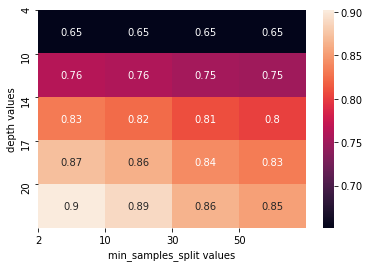

In [60]:
import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(train_auc,annot=True)

plt.yticks(np.arange(5), [4,10,14,17, 20])
plt.xticks(np.arange(4), [2,10,30,50])

plt.xlabel('min_samples_split values')
plt.ylabel('depth values')


plt.show()


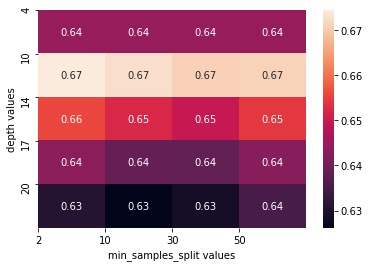

In [61]:
import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(cv_auc,annot=True)

plt.yticks(np.arange(5), [4,10,14,17, 20])
plt.xticks(np.arange(4), [2,10,30,50])

plt.xlabel('min_samples_split values')
plt.ylabel('depth values')


plt.show()

# Simple for loop (if you are having memory limitations use this)

In [62]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

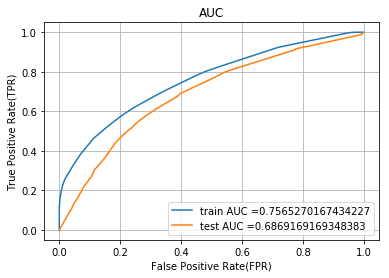

In [63]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_tree = DecisionTreeClassifier(class_weight='balanced',max_depth=10,min_samples_split=5)

dt_tree.fit(X_train1, y_train)

y_train_pred = batch_predict(dt_tree, X_train1[:,:])    
y_test_pred = batch_predict(dt_tree, X_test1[:])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train[:], y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test[:], y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [64]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [65]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24973009571991 for threshold 0.354
[[ 3835  3591]
 [ 8185 33430]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24995529464578342 for threshold 0.428
[[ 2693  2766]
 [ 7071 23522]]


the maximum value of tpr*(1-fpr) 0.46724724114406035 for threshold 0.461


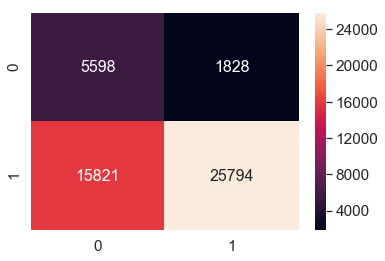

In [66]:
# Confusion matrix for train data
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

conf_matrix_xtrain =  pd.DataFrame(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix_xtrain, annot=True,annot_kws={"size": 16}, fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.41753765962179823 for threshold 0.461


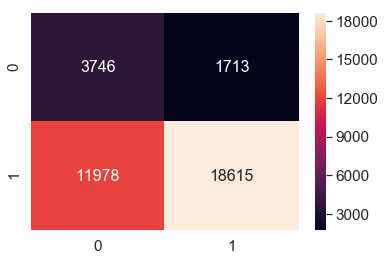

In [67]:
# Confusion matrix for test data
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

conf_matrix_xtest =  pd.DataFrame(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix_xtest, annot=True,annot_kws={"size": 16}, fmt='g')#font size

##  Graphviz visualization of DT on BOW, SET 1

In [68]:
bow_features = []

for a in vectorizer_cat.get_feature_names() :
    bow_features.append(a)
    
for a in vectorizer_sub_cat.get_feature_names() :
    bow_features.append(a)

for a in vectorizer_state.get_feature_names() :
    bow_features.append(a)
    
for a in vectorizer_teacherprefix.get_feature_names() :
    bow_features.append(a)
    
for a in vectorizer_projectgrade.get_feature_names() :
    bow_features.append(a)

In [69]:
bow_features.append("price")
bow_features.append("quantity")
bow_features.append("teacher_number_of_previously_posted")

In [70]:
for a in vectorizer_bow_essays.get_feature_names() :
    bow_features.append(a)
    
for a in vectorizer_bow_titles.get_feature_names() :
    bow_features.append(a)

In [71]:
len(bow_features)

7197

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=3)
dt1.fit(X_train1,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

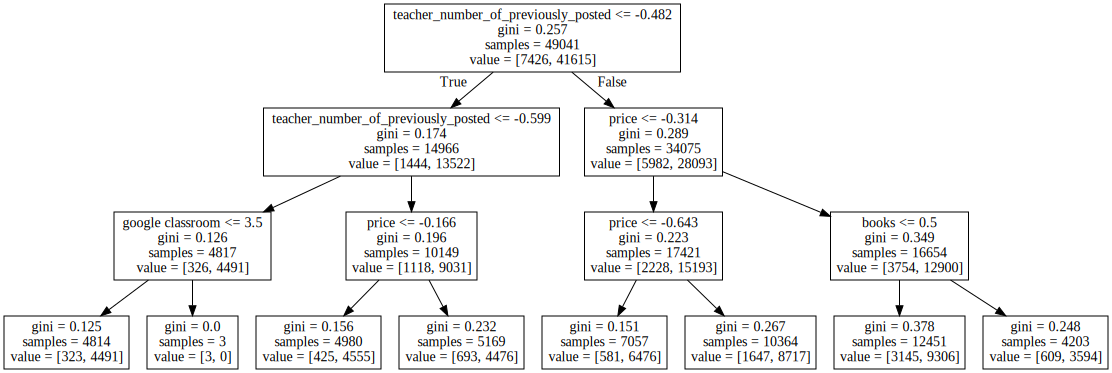

In [73]:
import graphviz
from graphviz import Source
from sklearn import tree

dot_data = tree.export_graphviz(dt1, out_file=None,feature_names=bow_features)

graph = graphviz.Source(dot_data)
graph.render("bow tree",view = True)
graphviz.Source(dot_data).view()

from IPython.display import display

with open("Source.gv") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


### WordCloud on BOW,  SET1 

In [74]:
bow_test_wc = essay_text_bow_xtest.todense()
bow_test_wc.shape

(36052, 5000)

In [75]:
vectorizer_bow_essay = CountVectorizer(min_df=10,max_features=5000) 
a = vectorizer_bow_essay.fit(X_train["preprocessed_essays"])

In [76]:
bow_features_set = a.get_feature_names()
len(bow_features_set)

5000

In [77]:
len(y_test_pred)

36052

In [78]:
y_test_count = list(y_test[::])

te_index = [] 
te_count = 0 
for i in tqdm(range(len(y_test_pred))):
    if y_test_count[i] == 0 and y_test_pred[i] >= 0.8:
        te_index.append(i)        
        te_count = te_count + 1     
    else :
        continue
        
print(te_count)

100%|████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 281816.31it/s]


476


In [79]:
dfa = pd.DataFrame(bow_test_wc)
dfa.shape

(36052, 5000)

In [80]:
dfa_final = dfa.iloc[te_index,:]

bow_indices = [] 
for j in range(5000):
    s = dfa_final[j].sum()
    if s >= 10 :
        bow_indices.append(j)
    else:
        continue

len(bow_indices)

1522

In [81]:
te_words = []
for a in bow_indices :
    te_words.append(str(bow_features_set[a]))

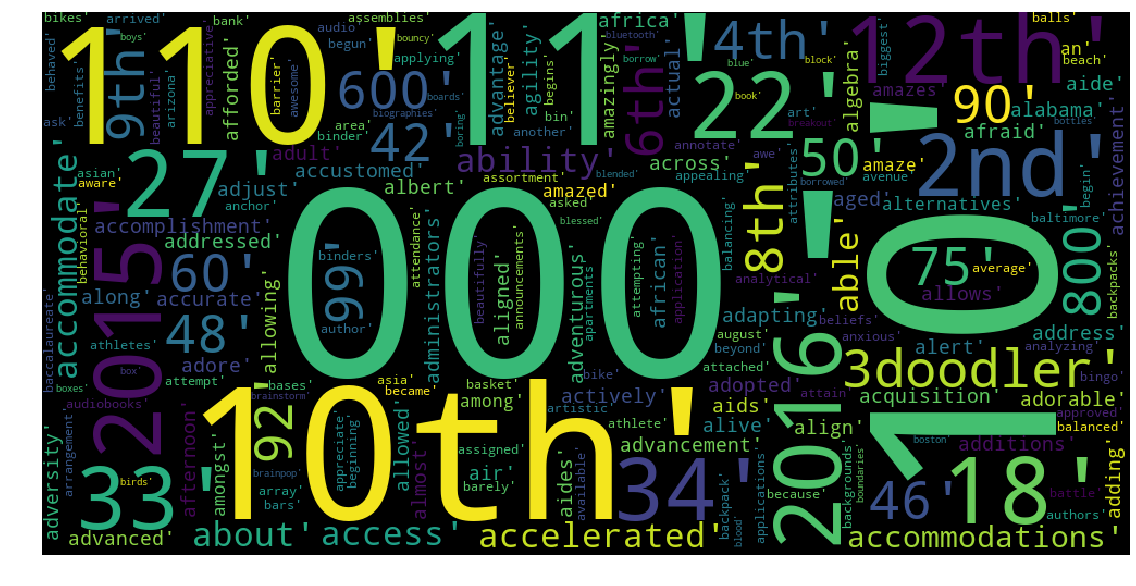

In [82]:
from wordcloud import WordCloud


wordcloud = WordCloud(width = 1000, height = 500).generate(str(te_words))

plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()


## Box Plot, SET1

In [83]:
dfb = pd.DataFrame(X_test['price'])

dfb_new = dfb.iloc[te_index,:]

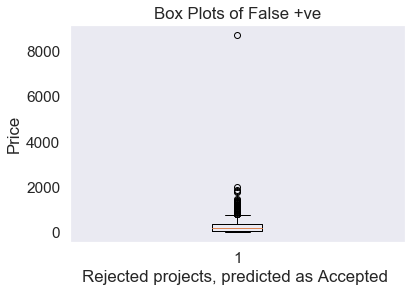

In [84]:
plt.boxplot(dfb_new.values)

plt.title('Box Plots of False +ve')
plt.xlabel('Rejected projects, predicted as Accepted ')
plt.ylabel('Price')
plt.grid()
plt.show()

# PDF, SET1

In [85]:
dfc = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

dfc_new = dfc.iloc[te_index,:]

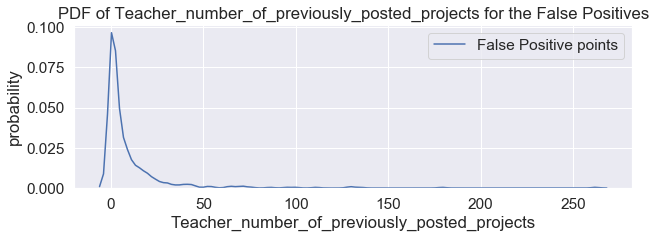

In [86]:
plt.figure(figsize=(10,3))

sns.distplot(dfc_new.values, hist=False, label="False Positive points")

plt.title('PDF of Teacher_number_of_previously_posted_projects for the False Positives')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')

plt.legend()
plt.show()

### 2.4.2 Applying Logistic Regression on TFIDF,<font color='red'> SET 2</font>

In [90]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train2=hstack((categories_one_hot_xtrain, sub_categories_one_hot_xtrain, 
                school_state_one_hot_xtrain, teacher_prefix_one_hot_xtrain, 
                project_grade_cat_one_hot_xtrain, price_standardized_xtrain, 
                 teacher_num_prev_projects_standardized_xtrain, 
                 quantity_standardized_xtrain,essay_tfidf_xtrain, proj_title_tfidf_xtrain)).tocsr()


X_cv2=hstack((categories_one_hot_xcv, sub_categories_one_hot_xcv, 
                school_state_one_hot_xcv, teacher_prefix_one_hot_xcv, 
                project_grade_cat_one_hot_xcv, price_standardized_xcv, 
               teacher_num_prev_projects_standardized_xcv,quantity_standardized_xcv,
                essay_tfidf_xcv, proj_title_tfidf_xcv)).tocsr()


X_test2=hstack((categories_one_hot_xtest, sub_categories_one_hot_xtest, 
                school_state_one_hot_xtest, teacher_prefix_one_hot_xtest, 
                project_grade_cat_one_hot_xtest, price_standardized_xtest, 
               teacher_num_prev_projects_standardized_xtest, quantity_standardized_xtest,
                essay_tfidf_xtest, proj_title_tfidf_xtest)).tocsr()

print(X_train2.shape)
print(X_cv2.shape)
print(X_test2.shape)

(49041, 7197)
(24155, 7197)
(36052, 7197)


### GridSearchCV

In [91]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time

start_time = time.time()

ds_tree1 = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[4,10,14,17, 20], 'min_samples_split': [2,10,30,50]}

clf1 = GridSearchCV(ds_tree1, parameters, cv= 10, scoring='roc_auc', n_jobs=-1)
clf1.fit(X_train2, y_train)

train_auc= clf1.cv_results_['mean_train_score']
train_auc_std= clf1.cv_results_['std_train_score']
cv_auc = clf1.cv_results_['mean_test_score']
cv_auc_std= clf1.cv_results_['std_test_score']

print("Total Execution time: " + str((time.time() - start_time)) + ' ms')

Total Execution time: 2234.137493133545 ms


In [92]:
train_auc = train_auc.reshape(5,4)
cv_auc = cv_auc.reshape(5,4)
train_auc

array([[0.66071697, 0.66071697, 0.66071697, 0.66071697],
       [0.78667601, 0.78445432, 0.77741851, 0.77280937],
       [0.85995024, 0.85440742, 0.83663179, 0.8269486 ],
       [0.89701211, 0.88926154, 0.86683949, 0.85438928],
       [0.92277042, 0.91400718, 0.88846669, 0.87410171]])

In [93]:
cv_auc

array([[0.64933382, 0.64933382, 0.64933382, 0.64933382],
       [0.65956505, 0.65969438, 0.65827001, 0.65980668],
       [0.64106097, 0.64104538, 0.6405275 , 0.64239485],
       [0.62594306, 0.62482752, 0.62597511, 0.63083676],
       [0.61730177, 0.61366859, 0.6148073 , 0.62325423]])

In [134]:
# Testing the performance of the model on test data, plotting ROC Curves
# Select best log(C) value
best_depth_set_tfidf = clf1.best_params_
print(best_depth_set_tfidf)

{'max_depth': 10, 'min_samples_split': 50}


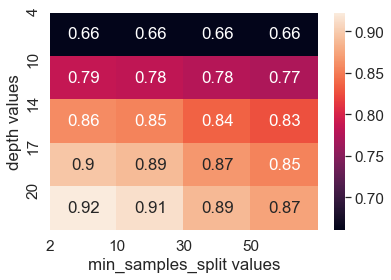

In [95]:
import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(train_auc,annot=True)

plt.yticks(np.arange(5), [4,10,14,17, 20])
plt.xticks(np.arange(4), [2,10,30,50])

plt.xlabel('min_samples_split values')
plt.ylabel('depth values')


plt.show()


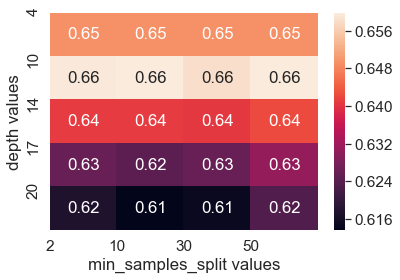

In [96]:
import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(cv_auc,annot=True)

plt.yticks(np.arange(5), [4,10,14,17, 20])
plt.xticks(np.arange(4), [2,10,30,50])

plt.xlabel('min_samples_split values')
plt.ylabel('depth values')


plt.show()


## Simple for loop (if you are having memory limitations use this)

In [180]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

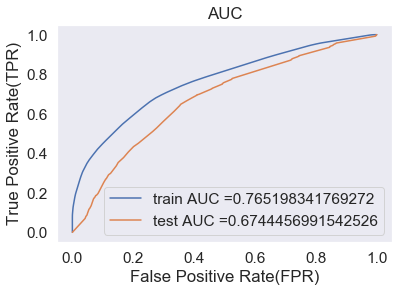

In [181]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_tree2 = DecisionTreeClassifier(class_weight='balanced',max_depth=10,min_samples_split=50)

dt_tree2.fit(X_train2, y_train)

y_train_pred = batch_predict(dt_tree2, X_train2[:,:])    
y_test_pred = batch_predict(dt_tree2, X_test2[:])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train[:], y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test[:], y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [182]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [183]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.493808240343531 for threshold 0.501
[[ 5391  2035]
 [13308 28307]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4172146495707397 for threshold 0.506
[[ 3515  1944]
 [10770 19823]]


the maximum value of tpr*(1-fpr) 0.493808240343531 for threshold 0.501


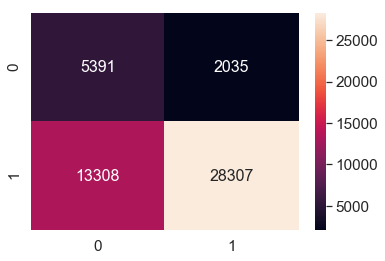

In [184]:
# Confusion Matrix for Train Data
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

conf_matrix_xtrain =  pd.DataFrame(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix_xtrain, annot=True,annot_kws={"size": 16}, fmt='g')#font size

the maximum value of tpr*(1-fpr) 0.4172146495707397 for threshold 0.506


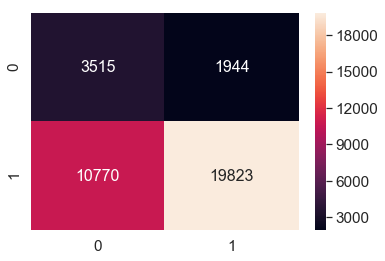

In [185]:
# Confusion matrix for test data
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

conf_matrix_xtest =  pd.DataFrame(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix_xtest, annot=True,annot_kws={"size": 16}, fmt='g')#font size

## Graphviz vizualization on DT Tfidf, SET2

In [186]:
tfidf_features = []

for a in vectorizer_cat.get_feature_names() :
    tfidf_features.append(a)
    
for a in vectorizer_sub_cat.get_feature_names() :
    tfidf_features.append(a)

for a in vectorizer_state.get_feature_names() :
    tfidf_features.append(a)
    
for a in vectorizer_teacherprefix.get_feature_names() :
    tfidf_features.append(a)
    
for a in vectorizer_projectgrade.get_feature_names() :
    tfidf_features.append(a)

In [187]:
tfidf_features.append("price")
tfidf_features.append("quantity")
tfidf_features.append("teacher_number_of_previously_posted")

In [188]:
for a in vectorizer_bow_essays.get_feature_names() :
    tfidf_features.append(a)
    
for a in vectorizer_bow_titles.get_feature_names() :
    tfidf_features.append(a)

In [189]:
len(tfidf_features)

7197

In [190]:
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(X_train2,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [194]:
import graphviz
from graphviz import Source
from sklearn import tree

dot_data = tree.export_graphviz(dt2, out_file=None,feature_names=tfidf_features)

graph = graphviz.Source(dot_data)
graph.render("Tfidf tree_211",view = True)
graphviz.Source(dot_data).view()

from IPython.display import display

with open("Source_211.gv",'wb') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Error: Could not open "Source.gv.pdf" for writing : Permission denied


CalledProcessError: Command '['dot.bat', '-Tpdf', '-O', 'Source.gv']' returned non-zero exit status 1. [stderr: b'Error: Could not open "Source.gv.pdf" for writing : Permission denied\r\n']

## WordCloud on Tfidf, SET2

In [110]:
tfidf_test_wc = essay_tfidf_xtest.todense()
tfidf_test_wc.shape

(36052, 5000)

In [111]:
vectorizer_tfidf_essay = CountVectorizer(min_df=10,max_features=5000) 
a = vectorizer_tfidf_essay.fit(X_train["preprocessed_essays"])

In [114]:
tfidf_features_set = a.get_feature_names()
len(tfidf_features_set)

5000

In [115]:
len(y_test_pred)

36052

In [116]:
y_test_count = list(y_test[::])

te_index = [] 
te_count = 0 
for i in tqdm(range(len(y_test_pred))):
    if y_test_count[i] == 0 and y_test_pred[i] >= 0.8:
        te_index.append(i)        
        te_count = te_count + 1     
    else :
        continue
        
print(te_count)

100%|████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 858886.88it/s]


688


In [117]:
dfa = pd.DataFrame(tfidf_test_wc)
dfa.shape

(36052, 5000)

In [118]:
dfa_final = dfa.iloc[te_index,:]

tfidf_indices = [] 
for j in range(5000):
    s = dfa_final[j].sum()
    if s >= 10 :
        tfidf_indices.append(j)
    else:
        continue

len(tfidf_indices)

57

In [119]:
te_words = []
for a in tfidf_indices :
    te_words.append(str(tfidf_features_set[a]))

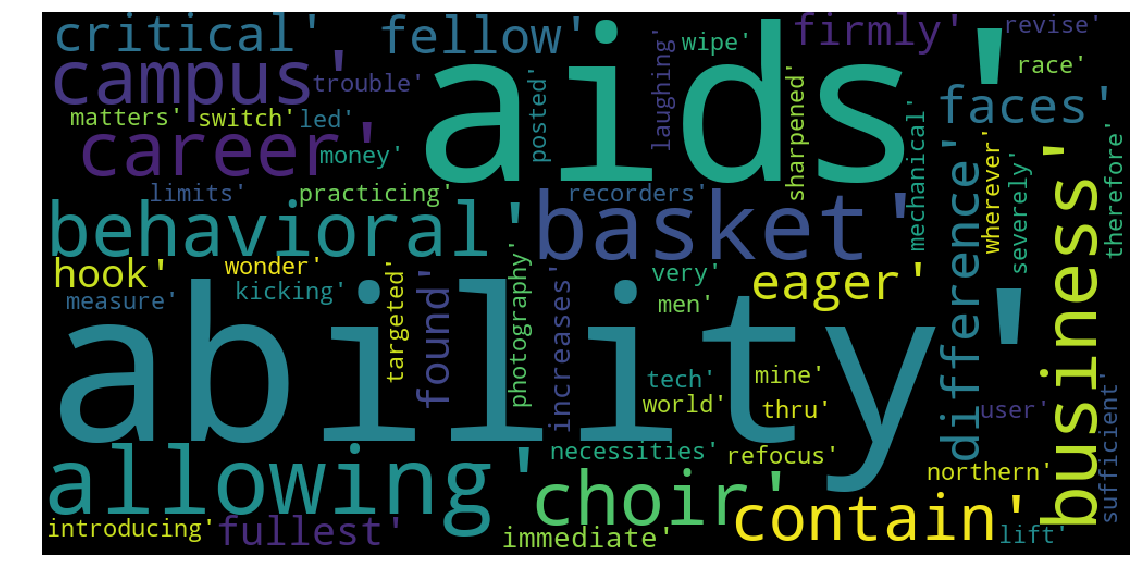

In [120]:
from wordcloud import WordCloud


wordcloud = WordCloud(width = 1000, height = 500).generate(str(te_words))

plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

# Box Plot, Set2

In [122]:
df_tfidf = pd.DataFrame(X_test['price'])

df_tfidf2 = df_tfidf.iloc[te_index,:]

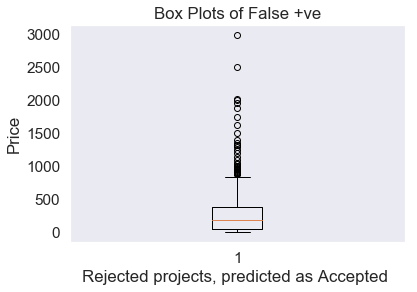

In [123]:
plt.boxplot(df_tfidf2.values)

plt.title('Box Plots of False +ve')
plt.xlabel('Rejected projects, predicted as Accepted ')
plt.ylabel('Price')
plt.grid()
plt.show()

# PDF, Set2

In [126]:
df_tfidf2 = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])
df_tfidf3 = df_tfidf2.iloc[te_index,:]

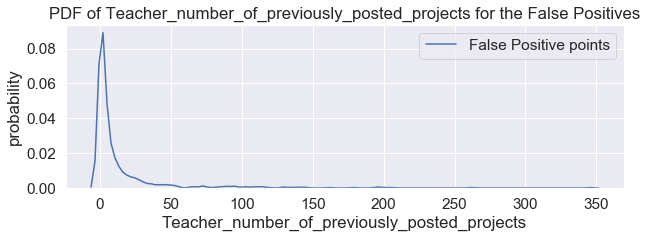

In [127]:
plt.figure(figsize=(10,3))

sns.distplot(df_tfidf3.values, hist=False, label="False Positive points")

plt.title('PDF of Teacher_number_of_previously_posted_projects for the False Positives')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')

plt.legend()
plt.show()

### 2.4.1 Applying Logistic Regression on AVG W2V,<font color='red'> SET 3</font>

In [128]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack


X_train3=hstack((categories_one_hot_xtrain, sub_categories_one_hot_xtrain, 
                school_state_one_hot_xtrain, teacher_prefix_one_hot_xtrain, 
                project_grade_cat_one_hot_xtrain, price_standardized_xtrain, 
               teacher_num_prev_projects_standardized_xtrain,
                essay_avg_w2v_vectors_xtrain, proj_title_avg_w2v_vectors_xtrain)).tocsr()


X_cv3=hstack((categories_one_hot_xcv, sub_categories_one_hot_xcv, 
                school_state_one_hot_xcv, teacher_prefix_one_hot_xcv, 
                project_grade_cat_one_hot_xcv, price_standardized_xcv, 
               teacher_num_prev_projects_standardized_xcv,
                essay_avg_w2v_vectors_xcv, proj_title_avg_w2v_vectors_xcv)).tocsr()


X_test3=hstack((categories_one_hot_xtest, sub_categories_one_hot_xtest, 
                school_state_one_hot_xtest, teacher_prefix_one_hot_xtest, 
                project_grade_cat_one_hot_xtest, price_standardized_xtest, 
               teacher_num_prev_projects_standardized_xtest,
                essay_avg_w2v_vectors_xtest, proj_title_avg_w2v_vectors_xtest)).tocsr()

print(X_train3.shape, y_train.shape)
print(X_cv3.shape, y_cv.shape)
print(X_test3.shape, y_test.shape)

(49041, 701) (49041,)
(24155, 701) (24155,)
(36052, 701) (36052,)


# GridSearchCV

In [129]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time

start_time = time.time()

ds_tree3 = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[4,10,14,17, 20], 'min_samples_split': [2,10,30,50]}

clf3 = GridSearchCV(ds_tree3, parameters, cv= 10, scoring='roc_auc', n_jobs=-1)
clf3.fit(X_train3, y_train)

train_auc= clf3.cv_results_['mean_train_score']
train_auc_std= clf3.cv_results_['std_train_score']
cv_auc = clf3.cv_results_['mean_test_score']
cv_auc_std= clf3.cv_results_['std_test_score']

print("Total Execution time: " + str((time.time() - start_time)) + ' ms')

Total Execution time: 24809.438630342484 ms


In [131]:
train_auc = train_auc.reshape(5,4)
cv_auc = cv_auc.reshape(5,4)
train_auc

array([[0.63261367, 0.632611  , 0.632611  , 0.632611  ],
       [0.81702321, 0.81555206, 0.80782116, 0.80030714],
       [0.92858561, 0.92392209, 0.90259214, 0.88537477],
       [0.96373432, 0.95850805, 0.93394633, 0.9141917 ],
       [0.97952492, 0.97487449, 0.95165165, 0.93164481]])

In [132]:
cv_auc

array([[0.61320429, 0.61320429, 0.61320429, 0.61320429],
       [0.59218263, 0.59258668, 0.59325285, 0.59393642],
       [0.55838949, 0.5585733 , 0.56126972, 0.56820137],
       [0.54735566, 0.54816037, 0.55337739, 0.55993367],
       [0.54140975, 0.54391011, 0.54864917, 0.55802125]])

In [133]:
# Testing the performance of the model on test data, plotting ROC Curves
# Select best log(C) value
best_depth_set_avgw2v = clf3.best_params_
print(best_depth_set_avgw2v)

{'max_depth': 4, 'min_samples_split': 2}


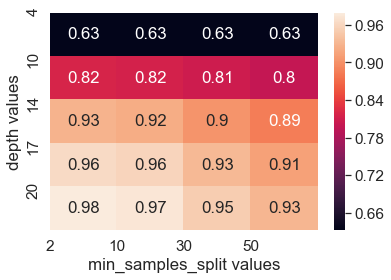

In [135]:
import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(train_auc,annot=True)

plt.yticks(np.arange(5), [4,10,14,17, 20])
plt.xticks(np.arange(4), [2,10,30,50])

plt.xlabel('min_samples_split values')
plt.ylabel('depth values')


plt.show()

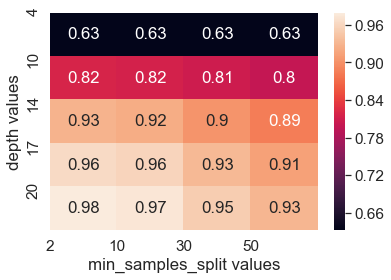

In [136]:
import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(train_auc,annot=True)

plt.yticks(np.arange(5), [4,10,14,17, 20])
plt.xticks(np.arange(4), [2,10,30,50])

plt.xlabel('min_samples_split values')
plt.ylabel('depth values')


plt.show()

## Simple for loop (if you are having memory limitations use this)

In [137]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

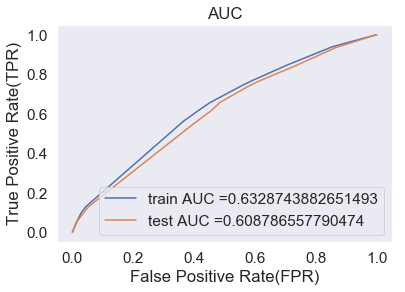

In [138]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_tree3 = DecisionTreeClassifier(class_weight='balanced',max_depth=4,min_samples_split=2)

dt_tree3.fit(X_train3, y_train)

y_train_pred = batch_predict(dt_tree3, X_train3[:,:])    
y_test_pred = batch_predict(dt_tree3, X_test3[:])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train[:], y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test[:], y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [139]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [140]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3611577132913868 for threshold 0.525
[[ 4332  3094]
 [15851 25764]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3394025431971379 for threshold 0.508
[[ 2833  2626]
 [10585 20008]]


the maximum value of tpr*(1-fpr) 0.3611577132913868 for threshold 0.525


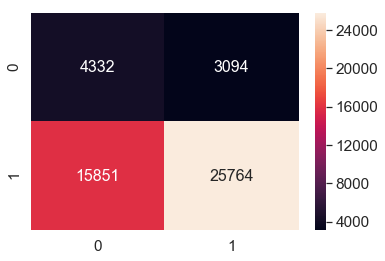

In [141]:
# Confusion Matrix for Train Data
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

conf_matrix_xtrain =  pd.DataFrame(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix_xtrain, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.3394025431971379 for threshold 0.508


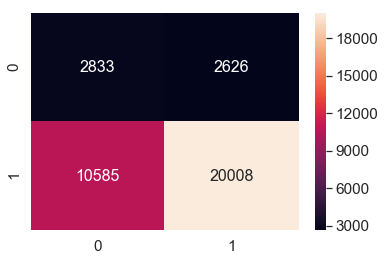

In [142]:
# Confusion matrix for test data
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

conf_matrix_xtest =  pd.DataFrame(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix_xtest, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.1 Applying DT on TFIDF Word2Vec,<font color='red'> SET 4</font>

In [143]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack


X_train4=hstack((categories_one_hot_xtrain, sub_categories_one_hot_xtrain, 
                school_state_one_hot_xtrain, teacher_prefix_one_hot_xtrain, 
                project_grade_cat_one_hot_xtrain, price_standardized_xtrain, 
               teacher_num_prev_projects_standardized_xtrain, quantity_standardized_xtrain,
                essay_tfidf_w2v_vectors_xtrain, proj_title_tfidf_w2v_vectors_xtrain)).tocsr()


X_cv4=hstack((categories_one_hot_xcv, sub_categories_one_hot_xcv, 
                school_state_one_hot_xcv, teacher_prefix_one_hot_xcv, 
                project_grade_cat_one_hot_xcv, price_standardized_xcv, 
               teacher_num_prev_projects_standardized_xcv, quantity_standardized_xcv,
                essay_tfidf_w2v_vectors_xcv, proj_title_tfidf_w2v_vectors_xcv)).tocsr()


X_test4=hstack((categories_one_hot_xtest, sub_categories_one_hot_xtest, 
                school_state_one_hot_xtest, teacher_prefix_one_hot_xtest, 
                project_grade_cat_one_hot_xtest, price_standardized_xtest, 
               teacher_num_prev_projects_standardized_xtest, quantity_standardized_xtest,
                essay_tfidf_w2v_vectors_xtest, proj_title_tfidf_w2v_vectors_xtest)).tocsr()

print(X_train4.shape, y_train.shape)
print(X_cv4.shape, y_cv.shape)
print(X_test4.shape, y_test.shape)

(49041, 702) (49041,)
(24155, 702) (24155,)
(36052, 702) (36052,)


## GridSearchCV

In [144]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time

start_time = time.time()

ds_tree4 = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[4,10,14,17, 20], 'min_samples_split': [2,10,30,50]}

clf4 = GridSearchCV(ds_tree4, parameters, cv= 10, scoring='roc_auc', n_jobs=-1)
clf4.fit(X_train4, y_train)

train_auc= clf4.cv_results_['mean_train_score']
train_auc_std= clf4.cv_results_['std_train_score']
cv_auc = clf4.cv_results_['mean_test_score']
cv_auc_std= clf4.cv_results_['std_test_score']

print("Total Execution time: " + str((time.time() - start_time)) + ' ms')

Total Execution time: 13642.559349298477 ms


In [150]:
# Testing the performance of the model on test data, plotting ROC Curves
# Select best log(C) value
best_d_set_tfidfw2v = clf4.best_params_
print(best_d_set_tfidfw2v)

{'max_depth': 4, 'min_samples_split': 2}


In [ ]:
# 10-51-4:00= 5 hours

In [145]:
train_auc = train_auc.reshape(5,4)
cv_auc = cv_auc.reshape(5,4)
train_auc

array([[0.66099999, 0.66099999, 0.66099999, 0.66099999],
       [0.8447136 , 0.84311294, 0.83391815, 0.82540361],
       [0.94422021, 0.93895555, 0.91595146, 0.89901902],
       [0.97111419, 0.96600966, 0.94169258, 0.9233272 ],
       [0.98330435, 0.97891695, 0.95690598, 0.93737053]])

In [146]:
cv_auc

array([[0.64626493, 0.64626493, 0.64626493, 0.64626493],
       [0.61601479, 0.61435476, 0.61366717, 0.61404903],
       [0.57748458, 0.57788584, 0.57993965, 0.5850044 ],
       [0.56385688, 0.56464634, 0.57039052, 0.57822059],
       [0.56033285, 0.55738639, 0.56744174, 0.57376075]])

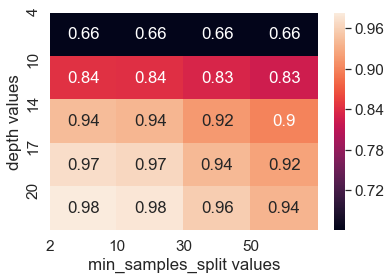

In [147]:
import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(train_auc,annot=True)

plt.yticks(np.arange(5), [4,10,14,17, 20])
plt.xticks(np.arange(4), [2,10,30,50])

plt.xlabel('min_samples_split values')
plt.ylabel('depth values')


plt.show()

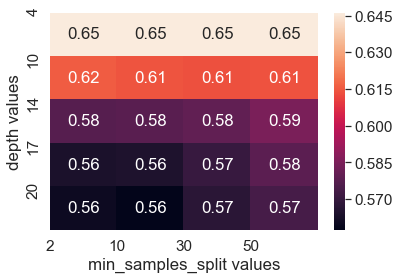

In [149]:
import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(cv_auc,annot=True)

plt.yticks(np.arange(5), [4,10,14,17, 20])
plt.xticks(np.arange(4), [2,10,30,50])

plt.xlabel('min_samples_split values')
plt.ylabel('depth values')


plt.show()

## Simple for loop (if you are having memory limitations use this)

In [151]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

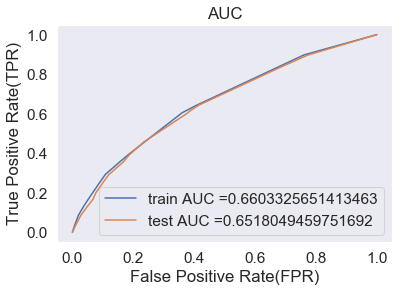

In [152]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_tree4 = DecisionTreeClassifier(class_weight='balanced',max_depth=4,min_samples_split=2)

dt_tree4.fit(X_train4, y_train)

y_train_pred = batch_predict(dt_tree4, X_train4[:,:])    
y_test_pred = batch_predict(dt_tree4, X_test4[:])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train[:], y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test[:], y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [172]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [154]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.38673783663032224 for threshold 0.545
[[ 4750  2676]
 [16454 25161]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.37670657850191797 for threshold 0.449
[[ 3369  2090]
 [11919 18674]]


the maximum value of tpr*(1-fpr) 0.38673783663032224 for threshold 0.545


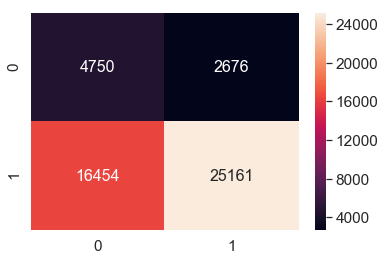

In [155]:
# Confusion Matrix for Train Data
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

conf_matrix_xtrain =  pd.DataFrame(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix_xtrain, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.37670657850191797 for threshold 0.449


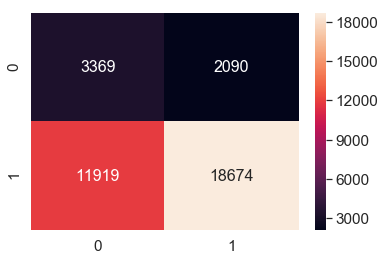

In [157]:
# Confusion matrix for test data
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

conf_matrix_xtest =  pd.DataFrame(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix_xtest, annot=True,annot_kws={"size": 16}, fmt='g')

# [Task-2]
#Select 5k best features from features of Set 2 using`feature_importances_`, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3

<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

## New Features: Set 5

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [159]:
from scipy.sparse import hstack

X_train5=hstack((categories_one_hot_xtrain, sub_categories_one_hot_xtrain, 
                school_state_one_hot_xtrain, teacher_prefix_one_hot_xtrain, 
                project_grade_cat_one_hot_xtrain, price_standardized_xtrain, 
                 teacher_num_prev_projects_standardized_xtrain, 
                 quantity_standardized_xtrain,essay_tfidf_xtrain, proj_title_tfidf_xtrain)).tocsr()


X_cv5=hstack((categories_one_hot_xcv, sub_categories_one_hot_xcv, 
                school_state_one_hot_xcv, teacher_prefix_one_hot_xcv, 
                project_grade_cat_one_hot_xcv, price_standardized_xcv, 
               teacher_num_prev_projects_standardized_xcv,quantity_standardized_xcv,
                essay_tfidf_xcv, proj_title_tfidf_xcv)).tocsr()


X_test5=hstack((categories_one_hot_xtest, sub_categories_one_hot_xtest, 
                school_state_one_hot_xtest, teacher_prefix_one_hot_xtest, 
                project_grade_cat_one_hot_xtest, price_standardized_xtest, 
               teacher_num_prev_projects_standardized_xtest, quantity_standardized_xtest,
                essay_tfidf_xtest, proj_title_tfidf_xtest)).tocsr()

print(X_train5.shape)
print(X_cv5.shape)
print(X_test5.shape)

(49041, 7197)
(24155, 7197)
(36052, 7197)


In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


dt_set5 = DecisionTreeClassifier(class_weight='balanced')
dt_set5.fit(X_train5, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [163]:
dm1=dt_set5.tree_.compute_feature_importances(normalize=False)
dtset5 = pd.DataFrame(dm1)
dtset5 = np.transpose(dtset5)
dtset5.shape

(1, 7197)

In [165]:
set5_indices = [] 
for j in range(7197):
    s = dtset5[j].sum()
    if s >0  :
        set5_indices.append(j)
    else:
        continue

len(set5_indices)

2029

In [166]:
n = X_train5.todense()
dtxtrain = pd.DataFrame(n)
dtxtrain.shape

(49041, 7197)

In [169]:
set5_dtxtrain = dtxtrain.iloc[:, set5_indices]

print(set5_dtxtrain.shape)
print(y_train.shape)

(49041, 2029)
(49041,)


In [170]:
m = X_train5.todense()
dtxtest = pd.DataFrame(m)
set_dtxtest = dtxtest.iloc[:, set5_indices]

print(set_dtxtest.shape)
print(y_test.shape)

(49041, 2029)
(36052,)


# Logistic Regression

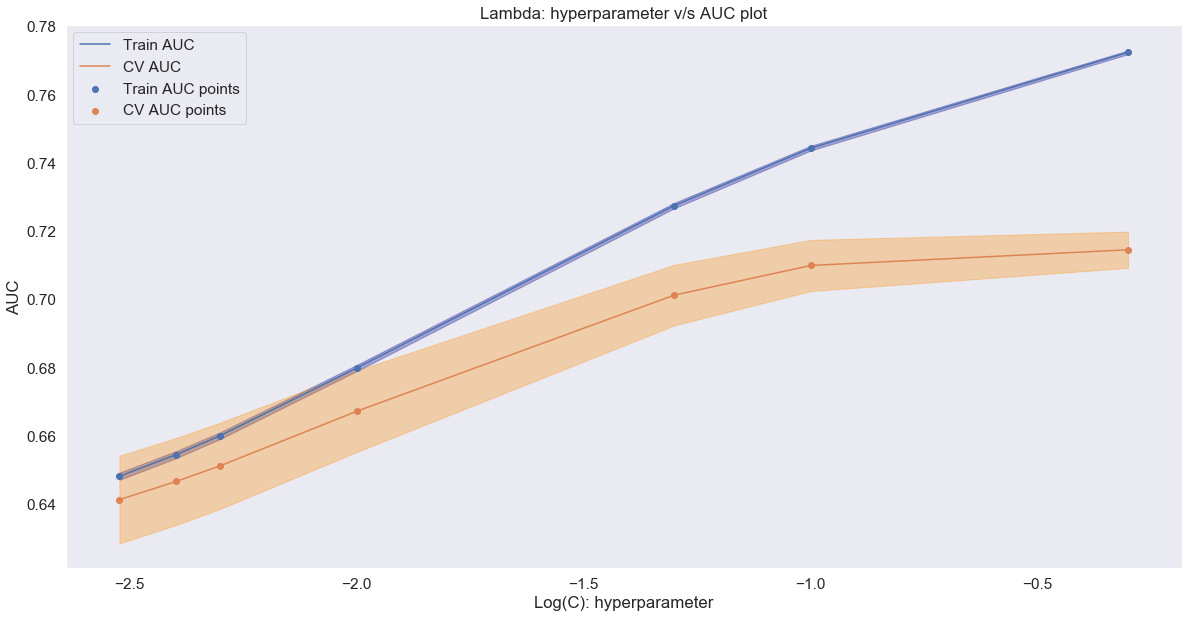

In [171]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression


C= [0.003,0.004,0.005,0.01,0.05,0.1,0.5]
logi_reg = LogisticRegression(class_weight='balanced')
parameters = {'C':C}
clf5 = GridSearchCV(logi_reg, parameters, cv= 10, scoring='roc_auc',return_train_score=True)
clf5.fit(set5_dtxtrain, y_train)

train_auc= clf5.cv_results_['mean_train_score']
train_auc_std= clf5.cv_results_['std_train_score']
cv_auc = clf5.cv_results_['mean_test_score']
cv_auc_std= clf5.cv_results_['std_test_score']

plt.figure(figsize=(20,10))
plt.plot(np.log10(parameters['C']), train_auc, label='Train AUC')

# https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(parameters['C']),train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(np.log10(parameters['C']), cv_auc, label='CV AUC')

# https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(parameters['C']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(np.log10(parameters['C']), train_auc, label='Train AUC points')
plt.scatter(np.log10(parameters['C']), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()

In [173]:
# Testing the performance of the model on test data, plotting ROC Curves
# Select best log(C) value

best_C_set5_features = clf5.best_params_
print(best_C_set5_features)

{'C': 0.5}


In [174]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

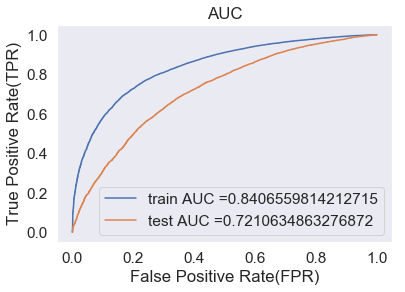

In [175]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


logireg = LogisticRegression(C=0.5,class_weight='balanced')
logireg.fit(X_train5[:,:], y_train[:])

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(logireg, X_train5[:,:])    
y_test_pred = batch_predict(logireg, X_test5[:])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train[:], y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test[:], y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [176]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [177]:
from sklearn.metrics import confusion_matrix

print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.353
[[ 3713  3713]
 [ 3769 37846]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092995 for threshold 0.413
[[ 2496  2963]
 [ 5315 25278]]


the maximum value of tpr*(1-fpr) 0.5847077200398573 for threshold 0.498


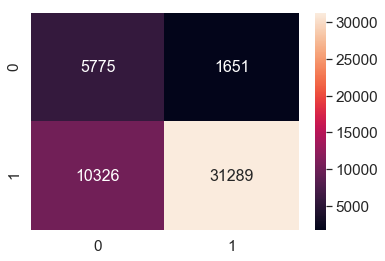

In [178]:
# Confusion matrix for train data
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

conf_matrix_xtrain =  pd.DataFrame(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix_xtrain, annot=True,annot_kws={"size": 16}, fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.4448312395082734 for threshold 0.477


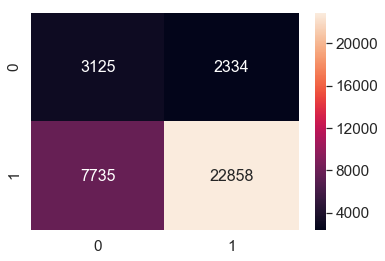

In [179]:
# Confusion matrix for test data
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

conf_matrix_xtest =  pd.DataFrame(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix_xtest, annot=True,annot_kws={"size": 16}, fmt='g')#font size

<h1>6. Conclusion</h1>

In [ ]:
# Please compare all your models using Prettytable library

In [197]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper Parameter(Max_depth,Min_samples_split)", "AUC"]
x.add_row(["BOW", "Decision Tree", [10, 5], 0.68])
x.add_row(["TFIDF", "Decision Tree", [10,50], 0.67])
x.add_row(["AVG W2V", "Decision Tree", [4,2], 0.60])
x.add_row(["TFIDF W2V", "Decision Tree", [4,2], 0.65])
x.add_row(["SET5 FEATURES", "Logistic Regression(C: Hyperparameter)", 0.5, 0.72])

print(x)

+---------------+----------------------------------------+----------------------------------------------+------+
|   Vectorizer  |                 Model                  | Hyper Parameter(Max_depth,Min_samples_split) | AUC  |
+---------------+----------------------------------------+----------------------------------------------+------+
|      BOW      |             Decision Tree              |                   [10, 5]                    | 0.68 |
|     TFIDF     |             Decision Tree              |                   [10, 50]                   | 0.67 |
|    AVG W2V    |             Decision Tree              |                    [4, 2]                    | 0.6  |
|   TFIDF W2V   |             Decision Tree              |                    [4, 2]                    | 0.65 |
| SET5 FEATURES | Logistic Regression(C: Hyperparameter) |                     0.5                      | 0.72 |
+---------------+----------------------------------------+--------------------------------------